In [1]:
import numpy as np
import pandas as pd
import csv
import os

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as dt
import time
from sklearn.metrics.pairwise import pairwise_distances 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

## Data Combine

In [6]:
metal=['Ag', 'Cu', 'Pd', 'Au']
Natom=[100, 116, 117, 128, 135, 165, 178, 200]
for n in Natom:
    fname=(metal[0]+'/'+metal[0]+str(n))
    print(fname)
    #np.genfrom

Ag/Ag100
Ag/Ag116
Ag/Ag117
Ag/Ag128
Ag/Ag135
Ag/Ag165
Ag/Ag178
Ag/Ag200


In [7]:
import glob
for i in range(4):
    filenames = glob.glob(metal[i]+'/*.txt')
    with open(metal[i]+'/'+metal[i]+'filecombine', 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)


In [8]:
df = pd.DataFrame()
for i in range(4):
    zeros=[0,0,0,0]    
    zeros[i]=1      ### one-hot-enconder
    #print(zeros)
    data= np.genfromtxt(metal[i]+'/'+metal[i]+'filecombine')
    length=data.shape[0]
    metaltype=(np.repeat([zeros], length,axis=0))
    subDF = pd.DataFrame(np.hstack((data,metaltype)))
    #print(subDF)
    df=df.append(subDF, ignore_index=True)
    #print(df)
#print(df)    

### 21 features for now. The first 16 features are from CNA (from 'fcc_bulk' to 'Unknown'). For each line,  sum up the first 16 features lead to the number of atoms  in that nanoparticle.


In [9]:
feature=['fcc_bulk', 'twin_HCP', 'IhDh_spine', 'Ihcenter', 'Dh_notch_edge', 'surface111', 'surface100',  'IhDh_edge', 'edge_111_100',
         'edge_111_111', 'Dh_notch_vertex', 'IhDh_vertex', 'tetrahedral_edge', 'TO_vertex', 'CO_vertex', 'Unknown','Temp', 'Ag', 'Cu', 'Pd', 'Au']
len(feature)

21

In [11]:
df.columns = feature
df.to_csv('allmetal.csv',index=False)
(df)

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,...,IhDh_vertex,tetrahedral_edge,TO_vertex,CO_vertex,Unknown,Temp,Ag,Cu,Pd,Au
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3.0,0.0,4.0,0.0,80.0,725.0,1.0,0.0,0.0,0.0
1,0.0,2.0,3.0,0.0,0.0,3.0,0.0,20.0,3.0,1.0,...,6.0,0.0,3.0,0.0,59.0,650.0,1.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,2.0,0.0,11.0,2.0,1.0,...,5.0,0.0,6.0,0.0,64.0,800.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,6.0,0.0,3.0,0.0,79.0,900.0,1.0,0.0,0.0,0.0
4,10.0,15.0,3.0,0.0,10.0,10.0,0.0,5.0,10.0,0.0,...,1.0,0.0,20.0,0.0,1.0,475.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,2.0,26.0,8.0,0.0,3.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,55.0,675.0,0.0,0.0,0.0,1.0
2862,2.0,26.0,8.0,0.0,3.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,55.0,830.0,0.0,0.0,0.0,1.0
2863,1.0,27.0,8.0,0.0,4.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,54.0,800.0,0.0,0.0,0.0,1.0
2864,2.0,26.0,8.0,0.0,3.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,55.0,300.0,0.0,0.0,0.0,1.0


## Read Data

In [12]:
MetalDF=pd.read_csv('allmetal.csv')
MetalDF

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,...,IhDh_vertex,tetrahedral_edge,TO_vertex,CO_vertex,Unknown,Temp,Ag,Cu,Pd,Au
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3.0,0.0,4.0,0.0,80.0,725.0,1.0,0.0,0.0,0.0
1,0.0,2.0,3.0,0.0,0.0,3.0,0.0,20.0,3.0,1.0,...,6.0,0.0,3.0,0.0,59.0,650.0,1.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,2.0,0.0,11.0,2.0,1.0,...,5.0,0.0,6.0,0.0,64.0,800.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,6.0,0.0,3.0,0.0,79.0,900.0,1.0,0.0,0.0,0.0
4,10.0,15.0,3.0,0.0,10.0,10.0,0.0,5.0,10.0,0.0,...,1.0,0.0,20.0,0.0,1.0,475.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,2.0,28.0,8.0,0.0,0.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,56.0,675.0,0.0,0.0,0.0,1.0
2883,2.0,28.0,8.0,0.0,0.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,56.0,830.0,0.0,0.0,0.0,1.0
2884,1.0,26.0,8.0,0.0,1.0,29.0,0.0,66.0,0.0,0.0,...,12.0,0.0,0.0,0.0,57.0,800.0,0.0,0.0,0.0,1.0
2885,2.0,28.0,8.0,0.0,0.0,30.0,0.0,64.0,0.0,0.0,...,12.0,0.0,0.0,0.0,56.0,300.0,0.0,0.0,0.0,1.0


In [11]:
MetalDF['totalN']= MetalDF.iloc[:,:16].sum(axis=1)   #get the total number of atoms in each nanocluster
MetalDF

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,...,tetrahedral_edge,TO_vertex,CO_vertex,Unknown,Temp,Ag,Cu,Pd,Au,totalN
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4.0,0.0,80.0,725.0,1.0,0.0,0.0,0.0,100.0
1,0.0,2.0,3.0,0.0,0.0,3.0,0.0,20.0,3.0,1.0,...,0.0,3.0,0.0,59.0,650.0,1.0,0.0,0.0,0.0,100.0
2,0.0,0.0,2.0,0.0,0.0,2.0,0.0,11.0,2.0,1.0,...,0.0,6.0,0.0,64.0,800.0,1.0,0.0,0.0,0.0,100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,3.0,0.0,79.0,900.0,1.0,0.0,0.0,0.0,100.0
4,10.0,15.0,3.0,0.0,10.0,10.0,0.0,5.0,10.0,0.0,...,0.0,20.0,0.0,1.0,475.0,1.0,0.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,2.0,28.0,8.0,0.0,0.0,30.0,0.0,64.0,0.0,0.0,...,0.0,0.0,0.0,56.0,675.0,0.0,0.0,0.0,1.0,200.0
2883,2.0,28.0,8.0,0.0,0.0,30.0,0.0,64.0,0.0,0.0,...,0.0,0.0,0.0,56.0,830.0,0.0,0.0,0.0,1.0,200.0
2884,1.0,26.0,8.0,0.0,1.0,29.0,0.0,66.0,0.0,0.0,...,0.0,0.0,0.0,57.0,800.0,0.0,0.0,0.0,1.0,200.0
2885,2.0,28.0,8.0,0.0,0.0,30.0,0.0,64.0,0.0,0.0,...,0.0,0.0,0.0,56.0,300.0,0.0,0.0,0.0,1.0,200.0


In [12]:
Metal_new = MetalDF.iloc[:,:16].div(MetalDF['totalN'], axis=0)  #get the percentgae of each CNA index
Metal_new[['Temp', 'Ag', 'Cu', 'Pd', 'Au']]= MetalDF[['Temp', 'Ag', 'Cu', 'Pd', 'Au']]
Metal_new.sort_values(by=['Ihcenter']).T

,0,2029,2031,2032,2033,2034,2036,2026,2037,2039,...,961,864,1108,1387,1480,1277,841,900,921,904
fcc_bulk,0.00,0.280899,0.286517,0.162921,0.162921,0.162921,0.162921,0.162921,0.162921,0.151685,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
twin_HCP,0.00,0.084270,0.089888,0.185393,0.185393,0.191011,0.185393,0.185393,0.185393,0.191011,...,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.000000
IhDh_spine,0.00,0.000000,0.000000,0.028090,0.028090,0.022472,0.028090,0.022472,0.028090,0.028090,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.025862,0.000000,0.000000
Ihcenter,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034188,0.034483,0.037037,0.037037,0.04,0.042424,0.043103,0.043103,0.051282,0.068966
Dh_notch_edge,0.01,0.000000,0.033708,0.039326,0.033708,0.028090,0.033708,0.033708,0.039326,0.028090,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
surface111,0.00,0.123596,0.174157,0.140449,0.134831,0.134831,0.134831,0.134831,0.140449,0.123596,...,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.000000
surface100,0.00,0.061798,0.044944,0.033708,0.039326,0.039326,0.039326,0.044944,0.033708,0.039326,...,0.000000,0.008621,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
IhDh_edge,0.01,0.011236,0.022472,0.106742,0.101124,0.078652,0.101124,0.073034,0.106742,0.106742,...,0.000000,0.043103,0.007407,0.007407,0.02,0.066667,0.017241,0.060345,0.000000,0.017241
edge_111_100,0.00,0.101124,0.146067,0.101124,0.089888,0.101124,0.089888,0.078652,0.101124,0.084270,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
edge_111_111,0.01,0.011236,0.011236,0.005618,0.011236,0.000000,0.011236,0.011236,0.005618,0.005618,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.008621,0.008547,0.000000


In [14]:
colname=['fcc_bulk', 'twin_HCP', 'IhDh_spine', 'Ihcenter', 'Dh_notch_edge', 'surface111', 'surface100', 
         'IhDh_edge', 'edge_111_100', 'edge_111_111', 'Dh_notch_vertex', 'IhDh_vertex', 
         'tetrahedral_edge', 'TO_vertex', 'CO_vertex', 'Unknown','Temp', 'Ag', 'Cu', 'Pd', 'Au']

transData= pd.DataFrame(StandardScaler().fit_transform(Metal_new), columns=colname)
#transData[['Ag','Cu', 'Pd', 'Au']] = MetalDF[['Ag','Cu', 'Pd', 'Au']]
transData.index.name = 'ID'
transData[['Ag', 'Cu', 'Pd', 'Au']]=MetalDF[['Ag', 'Cu', 'Pd', 'Au']]
transData

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,...,IhDh_vertex,tetrahedral_edge,TO_vertex,CO_vertex,Unknown,Temp,Ag,Cu,Pd,Au
ID,,,,,,,,,,,,,,,,,,,,,
0,-0.483997,-1.322014,-1.040936,-0.601696,0.006034,-1.671632,-0.444297,-1.514821,-0.625574,0.413848,...,-0.755036,-0.126876,0.132658,-0.1785,1.692663,0.432264,1.0,0.0,0.0,0.0
1,-0.483997,-1.051112,-0.459792,-0.601696,-0.597712,-1.117307,-0.444297,0.086577,0.101408,0.413848,...,0.248465,-0.126876,-0.049754,-0.1785,0.898686,0.038673,1.0,0.0,0.0,0.0
2,-0.483997,-1.322014,-0.653507,-0.601696,-0.597712,-1.302082,-0.444297,-0.671980,-0.140920,0.413848,...,-0.086036,-0.126876,0.497483,-0.1785,1.087728,0.825855,1.0,0.0,0.0,0.0
3,-0.483997,-1.322014,-1.040936,-0.601696,-0.597712,-1.671632,-0.444297,-1.346253,-0.625574,-0.570121,...,0.248465,-0.126876,-0.049754,-0.1785,1.654855,1.350643,1.0,0.0,0.0,0.0
4,0.818191,0.709749,-0.459792,-0.601696,5.439756,0.176117,-0.444297,-1.177685,1.797699,-0.570121,...,-1.424037,-0.126876,3.051254,-0.1785,-1.294205,-0.879706,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,-0.353779,0.574298,-0.266078,-0.601696,-0.597712,1.099992,-0.444297,1.097987,-0.625574,-0.570121,...,0.248465,-0.126876,-0.596991,-0.1785,-0.273376,0.169870,0.0,0.0,0.0,1.0
2883,-0.353779,0.574298,-0.266078,-0.601696,-0.597712,1.099992,-0.444297,1.097987,-0.625574,-0.570121,...,0.248465,-0.126876,-0.596991,-0.1785,-0.273376,0.983291,0.0,0.0,0.0,1.0
2884,-0.418888,0.438847,-0.266078,-0.601696,-0.295839,1.007605,-0.444297,1.182271,-0.625574,-0.570121,...,0.248465,-0.126876,-0.596991,-0.1785,-0.254472,0.825855,0.0,0.0,0.0,1.0


In [15]:
transData[colname[:-5]]

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,Dh_notch_vertex,IhDh_vertex,tetrahedral_edge,TO_vertex,CO_vertex,Unknown
ID,,,,,,,,,,,,,,,,
0,-0.483997,-1.322014,-1.040936,-0.601696,0.006034,-1.671632,-0.444297,-1.514821,-0.625574,0.413848,1.671729,-0.755036,-0.126876,0.132658,-0.1785,1.692663
1,-0.483997,-1.051112,-0.459792,-0.601696,-0.597712,-1.117307,-0.444297,0.086577,0.101408,0.413848,-1.213202,0.248465,-0.126876,-0.049754,-0.1785,0.898686
2,-0.483997,-1.322014,-0.653507,-0.601696,-0.597712,-1.302082,-0.444297,-0.671980,-0.140920,0.413848,0.806249,-0.086036,-0.126876,0.497483,-0.1785,1.087728
3,-0.483997,-1.322014,-1.040936,-0.601696,-0.597712,-1.671632,-0.444297,-1.346253,-0.625574,-0.570121,1.383236,0.248465,-0.126876,-0.049754,-0.1785,1.654855
4,0.818191,0.709749,-0.459792,-0.601696,5.439756,0.176117,-0.444297,-1.177685,1.797699,-0.570121,3.114194,-1.424037,-0.126876,3.051254,-0.1785,-1.294205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,-0.353779,0.574298,-0.266078,-0.601696,-0.597712,1.099992,-0.444297,1.097987,-0.625574,-0.570121,-1.213202,0.248465,-0.126876,-0.596991,-0.1785,-0.273376
2883,-0.353779,0.574298,-0.266078,-0.601696,-0.597712,1.099992,-0.444297,1.097987,-0.625574,-0.570121,-1.213202,0.248465,-0.126876,-0.596991,-0.1785,-0.273376
2884,-0.418888,0.438847,-0.266078,-0.601696,-0.295839,1.007605,-0.444297,1.182271,-0.625574,-0.570121,-1.213202,0.248465,-0.126876,-0.596991,-0.1785,-0.254472


## Visualize correlations between different varaibles

In [17]:
features = colname[:-5]
transData[features].corr()

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,Dh_notch_vertex,IhDh_vertex,tetrahedral_edge,TO_vertex,CO_vertex,Unknown
fcc_bulk,1.000000,0.204641,-0.343829,-0.287005,0.373893,0.610283,0.833743,-0.506164,0.928285,0.367546,0.049078,-0.720984,-0.048417,0.889598,0.157149,-0.507890
twin_HCP,0.204641,1.000000,0.664071,-0.004851,0.192066,0.654193,0.255466,0.260810,0.317030,-0.026596,0.298999,-0.440069,-0.124248,0.175934,0.044125,-0.818345
IhDh_spine,-0.343829,0.664071,1.000000,0.266046,-0.255893,0.230856,-0.291907,0.597038,-0.174127,-0.257201,0.129965,0.119463,-0.093999,-0.358809,-0.039010,-0.488812
Ihcenter,-0.287005,-0.004851,0.266046,1.000000,-0.334736,-0.313245,-0.256477,-0.081679,-0.221546,-0.216014,-0.041909,0.186545,-0.001121,-0.290985,-0.034183,0.233588
Dh_notch_edge,0.373893,0.192066,-0.255893,-0.334736,1.000000,0.223817,0.369392,-0.172888,0.390669,0.288154,0.221565,-0.336881,-0.026166,0.513385,0.017482,-0.324342
surface111,0.610283,0.654193,0.230856,-0.313245,0.223817,1.000000,0.466830,0.224112,0.583092,0.140874,0.014910,-0.495531,-0.157818,0.481351,0.029844,-0.883021
surface100,0.833743,0.255466,-0.291907,-0.256477,0.369392,0.466830,1.000000,-0.426675,0.820280,0.244914,0.012163,-0.637656,-0.042071,0.705510,0.137751,-0.444040
IhDh_edge,-0.506164,0.260810,0.597038,-0.081679,-0.172888,0.224112,-0.426675,1.000000,-0.456843,-0.312505,-0.277458,0.579847,-0.145474,-0.566774,-0.148629,-0.328619
edge_111_100,0.928285,0.317030,-0.174127,-0.221546,0.390669,0.583092,0.820280,-0.456843,1.000000,0.225315,0.129078,-0.726842,-0.058601,0.886826,0.129803,-0.584640
edge_111_111,0.367546,-0.026596,-0.257201,-0.216014,0.288154,0.140874,0.244914,-0.312505,0.225315,1.000000,0.162325,-0.359124,0.016123,0.374636,0.086817,-0.096388


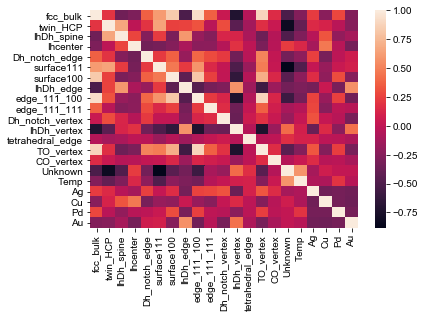

In [18]:
corr=transData[:].corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Address Multicollinearity using Principal Component Analysis (PCA)

In [214]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
reduced_data = pca.fit_transform(transData[colname[:-5]].drop_duplicates())   #[colname[:-5]] transData[colname[:-5]]
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(reduced_data)
print(reduced_data.shape)

[0.33193877 0.1676623  0.11406191 0.10166255]
0.7153255260282816
[[-1.08890639  1.86985585 -0.08805548 -1.2021489 ]
 [-0.90936266 -0.12324609 -0.17392091 -0.45469911]
 [-0.81531334  0.89994047 -0.07263088 -0.83803726]
 ...
 [ 0.25072214 -2.38246792  0.53654643  0.35208939]
 [ 0.33094399 -1.89655782  0.57403456 -0.0386723 ]
 [-0.01813707 -1.10421484  0.50988229 -0.29843957]]
(1511, 4)


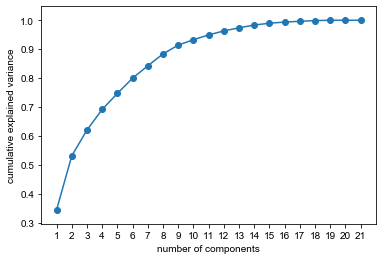

In [68]:
import seaborn as sns
%matplotlib inline
pca = PCA().fit(transData[colname])
plt.scatter(range(1,22),np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1,22),np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,22))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


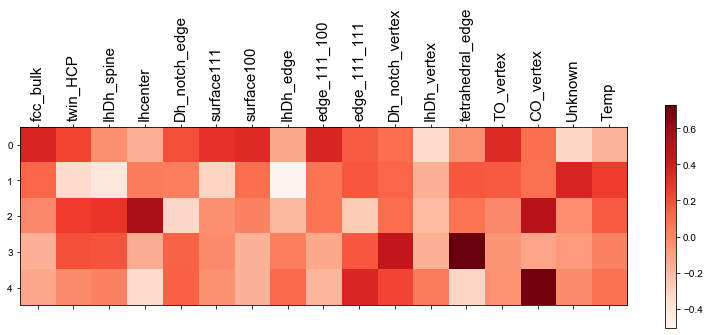

In [66]:
plt.matshow(pca.components_, cmap='Reds')
plt.xticks(range(21-4), colname[:-4], rotation = 90, ha = "center", fontsize = 15)
plt.colorbar()
plt.show()

In [215]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
print(reduced_data.shape)
for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0).fit(reduced_data )
    preds = km.predict(reduced_data )
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(reduced_data )))
    km_scores.append(-km.score(reduced_data ))
    
    silhouette = silhouette_score(reduced_data ,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(reduced_data ,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
   #v_measure = v_measure_score(reduced_data ,preds)
   #vmeasure_score.append(v_measure)
   #print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
   #print("-"*100)

(1511, 4)
Score for number of cluster(s) 2: -10876.867923455098
Silhouette score for number of cluster(s) 2: 0.5358481726243828
Davies Bouldin score for number of cluster(s) 2: 0.7585570386485158
Score for number of cluster(s) 3: -7328.47145712543
Silhouette score for number of cluster(s) 3: 0.4724603495189585
Davies Bouldin score for number of cluster(s) 3: 0.827574807563395
Score for number of cluster(s) 4: -5032.28265742552
Silhouette score for number of cluster(s) 4: 0.5088359789984221
Davies Bouldin score for number of cluster(s) 4: 0.6754808943304081
Score for number of cluster(s) 5: -4114.479514110215
Silhouette score for number of cluster(s) 5: 0.51746779875275
Davies Bouldin score for number of cluster(s) 5: 0.7347885367971088
Score for number of cluster(s) 6: -3438.471140431769
Silhouette score for number of cluster(s) 6: 0.45317679524706966
Davies Bouldin score for number of cluster(s) 6: 0.8101394817575495
Score for number of cluster(s) 7: -3021.828790115436
Silhouette scor

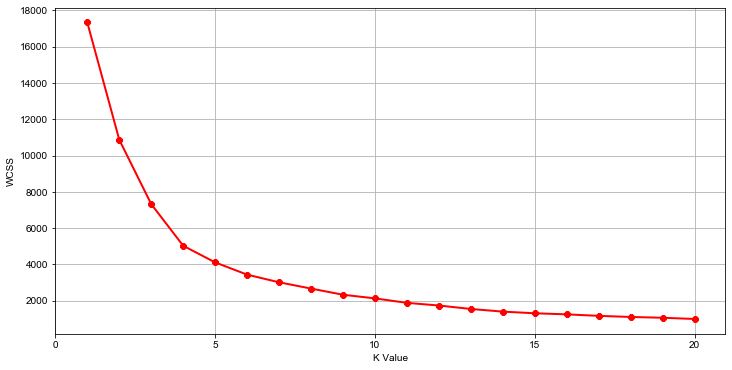

In [218]:
wcss = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(reduced_data ) #(df.iloc[:,1:-2])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(0,21,5))
plt.ylabel("WCSS")
plt.show()  

Text(0, 0.5, 'Silhouette score ')

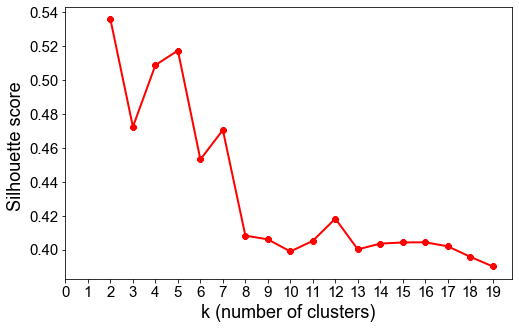

In [216]:
plt.figure(figsize=(8,5))    
#plt.grid()
plt.plot(range(2,20), km_silhouette, linewidth=2, color="red", marker ="8")
plt.xlabel("k (number of clusters)", fontsize = 18)
plt.xticks(np.arange(0,20,1), fontsize = 15)
plt.yticks( fontsize = 15)
plt.ylabel("Silhouette score ", fontsize = 18)
#plt.savefig('Silhouette_in.png', dpi=300)  

Text(0, 0.5, 'Davies Bouldin score')

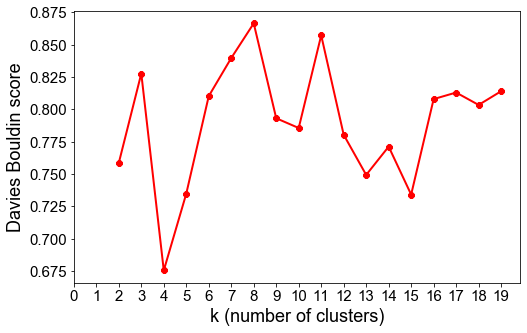

In [217]:
plt.figure(figsize=(8,5))    
#plt.grid()
plt.plot(range(2,20), db_score, linewidth=2, color="red", marker ="8")
plt.xlabel("k (number of clusters)", fontsize = 18)
plt.xticks(np.arange(0,20,1), fontsize = 15)
plt.yticks( fontsize = 15)
plt.ylabel("Davies Bouldin score", fontsize = 18)
#plt.savefig('Silhouette_in.png', dpi=300)  

## Define ILS

In [41]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(
        ['#837E7C','#377eb8', '#ff7f00', 
         '#4daf4a','#f781bf', '#a65628', 
         '#984ea3','#999999', '#e41a1c', '#dede00']
         ),int(10))))

In [42]:
def ILS(df, labelColumn , outColumn = 'LS' ,  iterative = True ) :
    ''' 
    @author: amanda.parker@data61.csiro.au
    Citation and implemenatation details : "" 
    
    Apply iterative label spreading in a multi-dimensional feature-space. 
    Returns labels for all points and the order-labelled 
    and distance-when-labelled for all newly labelled points. 
    INPUTS : 
        df = pandas dataFrame: 
            all features are columns (and only those) + 
            one column holding initial labels  
        iterative = boolean : 
            True : label spreading to unlabelled points applied iteratively       
            False : all unlabelled points relabelled with regard to 
                    initially labelled set 
        labelColumn = String: 
            Column name for column that holds initial labels. 
            0 = to be labelled
            positive integers = assigned label.  
    OUTPUTS : 
        pandas dataSeries: 
            index : same index input df
            name : outColumn 
            data : Labels for all points 
                (all values 0 replaced with a positive integer)
        pandas dataFrame: 
            Only contains points that were labelled by ILS 
            index : same as input df *reordered by order labelled*
            columns: 
                minR : distance when relabelled  
                IDclosestLabelled : ID of point label recieved from'   
     '''
    
    featureColumns = [ i for i in df.columns if i != labelColumn ]
    # Keep original index columns in DF 
    indexNames = list(df.index.names)
    oldIndex = df.index
    df = df.reset_index(drop = False)
    
    # separate labelled and unlabelled points 
    labelled = [ 
        group for group in df.groupby(df[labelColumn] != 0 )
        ][True][1].fillna(0)
    unlabelled = [ group for group in df.groupby(df[labelColumn]!= 0) ][False][1]
    
    # lists for ordered output data
    outD = []
    outID = []
    closeID = []
    
    # Continue while any point is unlabelled 
    while len(unlabelled) > 0 :
        # Calculate labelled to unlabelled distances matrix (D) 
        D = pairwise_distances(
            labelled[featureColumns].values,
            unlabelled[featureColumns].values)
        
        # Find the minimum distance between a labelled and unlabelled point 
        # first the argument in the D matrix 
        (posL, posUnL) = np.unravel_index(D.argmin(), D.shape)
        # then convert to an index ID in the data frame 
        # (The ordering will switch during iterations, more robust)
        idUnL = unlabelled.iloc[posUnL].name
        idL = labelled.iloc[posL].name
        
        # Switch label from 0 to new label
        unlabelled.loc[idUnL, labelColumn] = labelled.loc[idL,labelColumn]
        # move newly labelled point to labelled dataframe 
        labelled = labelled.append(unlabelled.loc[idUnL])
        # drop from unlabelled data frame 
        unlabelled.drop(idUnL, inplace = True)
        
        # output the distance and id of the newly labelled point 
        outD.append(D.min())
        outID.append(idUnL)
        closeID.append(idL)
            
    # Throw error if loose or duplicate points 
    if len(labelled) + len(unlabelled) != len(df) :
        raise Exception(
            '''The number of labelled ({}) and unlabelled ({}) 
                points does not sum to the total ({})'''.format(
                len(labelled), len(unlabelled),len(df)) )
    
    # Reodered index for consistancy 
    newIndex = oldIndex[outID]
    
    orderLabelled = pd.Series(
                        data = outD, index = newIndex, name = 'minR')
    # ID of point label was spread from 
    closest = pd.Series(
              data = closeID, index = newIndex,name = 'IDclosestLabel')
    labelled = labelled.rename(columns = {labelColumn : outColumn })
    # new labels as dataseries 
    newLabels = labelled.set_index(indexNames)[outColumn]
    
    # return 
    return newLabels, pd.concat([orderLabelled,closest],axis = 1)      
    

In [43]:
def min_toCentroid(df, centroid = None , features = None ) : 
    '''INPUT: 
        df = pandas dataFrame: 
                columns are dimensions
        centroid = list or tuple with consistant dimension
        features = string or list of strings: 
                select only these columns of df
        '''
    
    if type(features) == type(None) : 
        features = df.columns 
    
    if type(centroid) == type(None) : 
        centroid = df[features].mean()
    
    # distance from centroid for each point 
    dist = df.apply(lambda row : sum( 
            [(row[j] - centroid[i])**2  for i, j in enumerate(features)] 
            ) , axis = 1 )
    
    # return index
    return dist.idxmin()

In [44]:
def plot_ILSdistances(df, minR, centroid, label) :
    fig = plt.figure(figsize=(24,7))
   # fig.subplots_adjust(left=.07, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)

    ax = plt.subplot(1, 2, 1)
    #plt.ylim(0, 1)
    plt.xticks(); plt.yticks()
    #ax.plot(range(len(minR)), minR, color=colors[label], linewidth=1) # linestyle='dashed',
    ax.plot(range(len(minR)), minR,  linewidth=1,color='gray',alpha=0.5)
    ax.scatter(range(len(minR)), minR, c=range(len(minR)), cmap='jet',s=5)
    return (minR)

    #ax = plt.subplot(1, 2 , 2)
    #plt.xticks(()); plt.yticks(())
    #plt.xlim(-3,3); plt.ylim(-3, 3)
    #ax.scatter(df['x'].values, df['y'].values, s=4, color=colors[0])
    #ax.scatter(centroid[0], centroid[1], s=3,          color=colors[label],marker = 'x', linewidth =20)

In [45]:
from sklearn.cluster import KMeans

def kMeans_success(df, k) :

    # Create column for labels 
    df['label'] = 0
    # kMean clustering 
    model = KMeans(n_clusters=k, random_state=0, 
                   n_init = 10).fit(df[features]) 
    # Create columns for cluster labels 
    # = integers starting from 1 
    # (0 is reserved for unlabelled)
    df['kMean'] = model.labels_ + 1 

    # Plot kMean clustering result cluster 
    fig = plt.figure(figsize=(3,3))
    ax1 = plt.subplot(1,1,1)
    plt.xticks(()); plt.yticks(())
    #ax1.scatter(df['x'].values, df['y'].values, s=4,   color=colors[df['kMean'].values]) 
    print (df)
    # For each cluster identified by kMeans clustering, Run ILS and plot  
    for label, group in df.groupby(by = 'kMean') :
        # Taking points only in that cluster 
        group = group.copy()
        group['label'] = 0 
        centroid = model.cluster_centers_[label-1]  
        # Label point closest to centroid of cluster
        group.loc[min_toCentroid(group[features]),'label'] = label

        # Run ILS 
        ti = time.time()
        newL, orderedL = ILS(group,'label')  
        tf = time.time()
        print(
        'Iterative label spreading took {:.1f}s to label {} points'.format( 
        tf-ti, len(group) ))

        plot_ILSdistances(group, orderedL['minR'].values, centroid, label)

In [46]:

def ILS_Single_Label(df) : # features = ['x','y', 'z','s']
    df = df.copy()
    df['label'] = 0 
    centroid = df[features].mean()
    closestToCentroid =  min_toCentroid(df[features], centroid = centroid , features = features ) 
    df.loc[0,'label'] = 1
    newL, orderedL = ILS(df[features + ['label']],'label')  
    plot_ILSdistances(df, orderedL['minR'].values, centroid, 1)
    #print(df)

### Apply ILS

['fcc_bulk', 'twin_HCP', 'IhDh_spine', 'Ihcenter', 'Dh_notch_edge', 'surface111', 'surface100', 'IhDh_edge', 'edge_111_100', 'edge_111_111', 'Dh_notch_vertex', 'IhDh_vertex', 'tetrahedral_edge', 'TO_vertex', 'CO_vertex', 'Unknown', 'Temp']


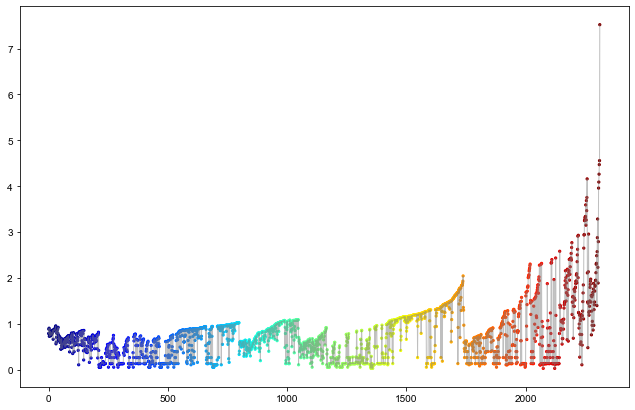

In [72]:
features = colname[:-4]
print(features)
ILS_Single_Label(transData[features].drop_duplicates())

['fcc_bulk', 'twin_HCP', 'IhDh_spine', 'Ihcenter', 'Dh_notch_edge', 'surface111', 'surface100', 'IhDh_edge', 'edge_111_100', 'edge_111_111', 'Dh_notch_vertex', 'IhDh_vertex', 'tetrahedral_edge', 'TO_vertex', 'CO_vertex', 'Unknown', 'Temp', 'Ag', 'Cu', 'Pd', 'Au']


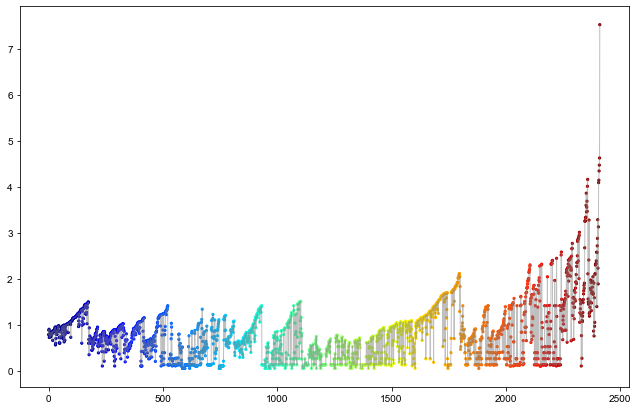

In [48]:
features = colname
print(features)
ILS_Single_Label(transData[features].drop_duplicates())

ID
0.0       1.0
268.0     1.0
703.0     1.0
398.0     1.0
323.0     1.0
         ... 
406.0     1.0
2118.0    1.0
65.0      1.0
300.0     1.0
40.0      1.0
Name: LS, Length: 1511, dtype: float64
          minR  IDclosestLabel
ID                            
268   0.681750               0
703   0.816813               0
398   0.651594             441
323   0.677252             441
239   0.725014             441
...        ...             ...
406   4.070690             200
2118  4.258609             393
65    4.458590              50
300   4.556936              29
40    7.516818             140

[1510 rows x 2 columns]


,minR,IDclosestLabel
ID,,
268,0.681750,0
703,0.816813,0
398,0.651594,441
323,0.677252,441
239,0.725014,441
...,...,...
406,4.070690,200
2118,4.258609,393
65,4.458590,50


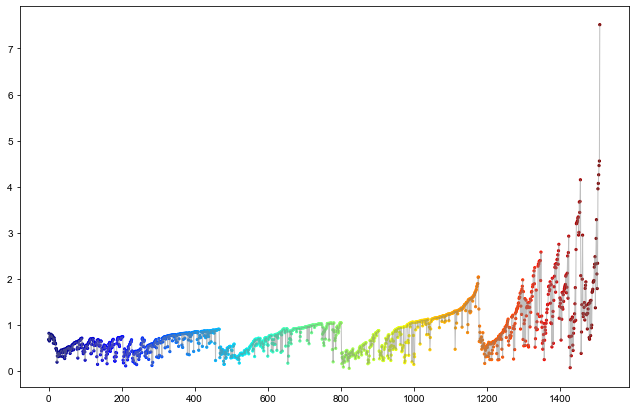

In [101]:
features = colname[:-5]
df_t = transData[features].drop_duplicates().copy()
df_t['label'] = 0 
centroid = df_t[features].mean()
closestToCentroid =  min_toCentroid(df_t[features], centroid = centroid , features = features ) 
df_t.loc[0,'label'] = 1
newL, orderedL = ILS(df_t[features + ['label']],'label')  
print(newL)
print(orderedL)
plot_ILSdistances(df_t, orderedL['minR'].values, centroid, 1)
display(orderedL)

## Find peaks

In [49]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy

In [567]:
#peaks, _ = find_peaks(orderedL['minR'].values, distance = 10,height=0.3,threshold = 0.3) #, width=0.7)
#plt.scatter(range(len(orderedL['minR'])),orderedL['minR'].values , s = 3)
#plt.plot(peaks, orderedL['minR'].values[peaks], "x", c='r')
#plt.plot(np.zeros_like(orderedL['minR'].values), "--", color="gray")
#plt.show()

[ 203  467  801 1177]
203 [264 334 376] 333
[0, 203, 467, 801, 1177, 1510]


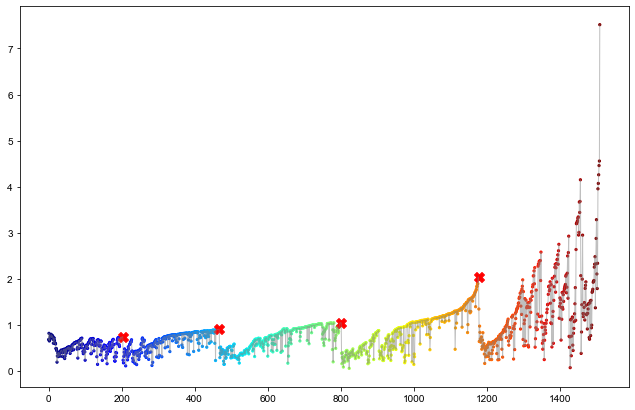

In [103]:
indexes = scipy.signal.argrelextrema(
   orderedL['minR'].values,order=80,
    comparator=np.greater
)
plot_ILSdistances(df_t, orderedL['minR'].values, centroid, 1)
#plt.scatter(range(len(orderedL['minR'])),orderedL['minR'].values , s = 3)
plt.scatter(indexes[0][1:], orderedL['minR'].values[indexes[0][1:]],  c='r', marker = 'X', s=100) #,linewidth=25)
print(indexes[0][1:])
print(indexes[0][1],np.diff(indexes[0][1:]),len(orderedL['minR'])-indexes[0][-1])
indexcluster=indexes[0][1:].tolist()
indexcluster.append(len(orderedL['minR']))
indescluster=[0]+indexcluster
print(indescluster)

In [750]:
#x1= orderedL['minR'].values[:indexes[0][1]]
#x2= orderedL['minR'].values[indexes[0][1] : indexes[0][2]]
#x3= orderedL['minR'].values[indexes[0][2] : indexes[0][3]]
#x4= orderedL['minR'].values[indexes[0][3]:]
#print (len(x1), len(x2), len(x3),len(x4))
#
#features = colname[:16]
#MetalDF[features].drop_duplicates()

0 203


,minR,IDclosestLabel
ID,,
2062,1.427970,203
2073,0.554850,125
2053,0.436534,124
2083,0.555835,125
2055,0.578875,126
...,...,...
323,0.677252,1
239,0.725014,1
515,0.750752,1


0 []
203 467


,minR,IDclosestLabel
ID,,
1857,1.315384,264
1891,0.420908,128
1644,0.786522,129
2069,0.960961,129
1582,0.985229,139
...,...,...
29,1.048007,137
523,1.144106,233
1702,1.152781,126


1 [189]
467 801


,minR,IDclosestLabel
ID,,
128,1.340353,334
2606,1.043890,249
2077,0.994893,256
2842,1.105702,209
2792,0.590218,246
...,...,...
11,1.246635,216
32,1.529574,183
2831,1.546270,209


2 [121]
801 1177


,minR,IDclosestLabel
ID,,
2682,1.371555,376
2626,1.141858,254
2672,0.957200,188
2640,1.034421,188
2663,0.698225,86
...,...,...
900,1.358043,328
841,1.240682,319
1480,1.292775,318


3 [208]
1177 1510


,minR,IDclosestLabel
ID,,
1481,2.292075,333
272,2.178789,150
278,1.005672,78
139,0.726783,76
1873,0.958595,75
...,...,...
300,4.556936,163
2524,4.723342,333
2301,5.322537,106


4 []
[0, 203, 392, 467, 588, 801, 1009, 1177, 1510]


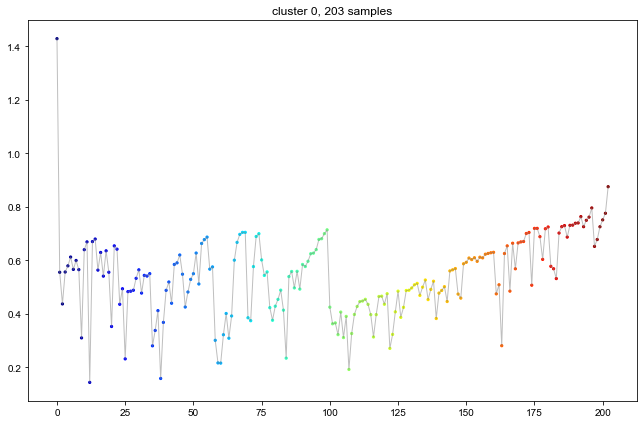

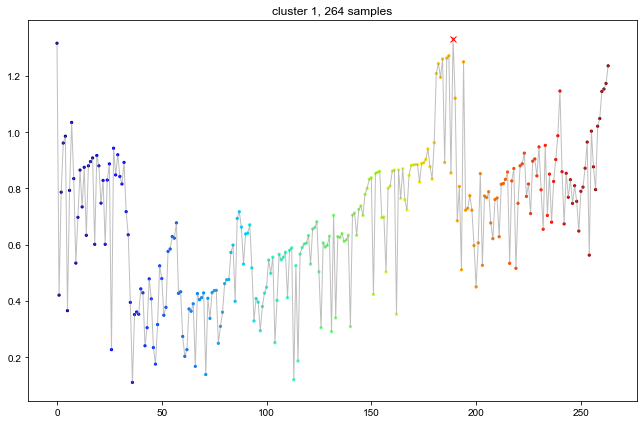

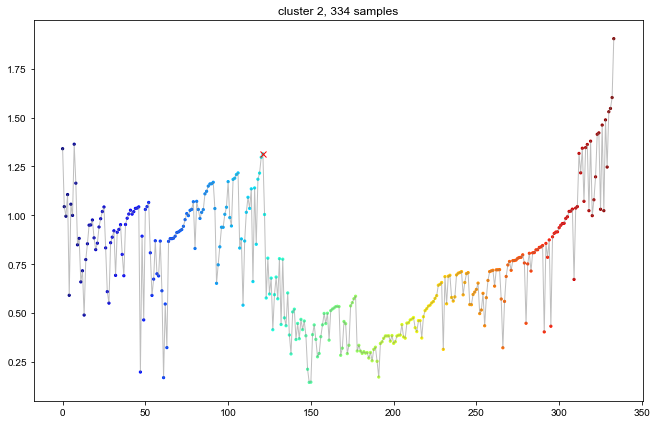

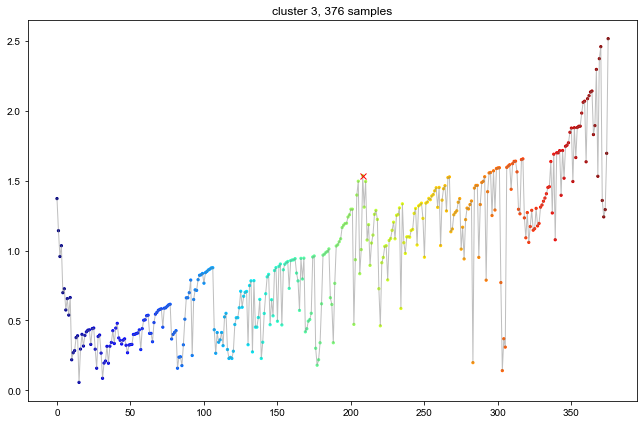

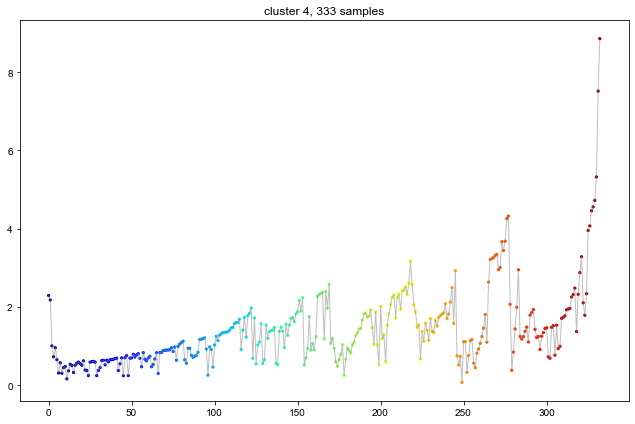

In [105]:
features = colname[:-5]
reindex=[0]
for i in range(len(indescluster)-1):
    start,end=indescluster[i], indescluster[i+1]
    print(start, end)
    sub=pd.merge(orderedL, transData[features].drop_duplicates()[1:], left_index=True, right_index=True)[start: end]
    df_t = sub.drop_duplicates().copy()
    df_t['label'] = 0 
    centroid = df_t[features].mean()
    closestToCentroid =  min_toCentroid(df_t[features], centroid = centroid , features = features ) 
    df_t.loc[0,'label'] = 1
    newL_sub1, orderedL_sub1 = ILS(df_t[features + ['label']],'label')  
    #print(newL_sub1)
    #
    #orderedL_sub1['pre']=j
    display(orderedL_sub1)
    plot_ILSdistances(df_t, orderedL_sub1['minR'].values, centroid, 1)
    #print(i)
    indexes = scipy.signal.argrelextrema(
       orderedL_sub1['minR'].values,order=80,
        comparator=np.greater
    )
    trueindex=indexes[0].tolist()
    if trueindex!=[]:
        if end-start-trueindex[-1]< 50:
            trueindex.remove(trueindex[-1])
        if trueindex!=[] and trueindex[0]< 50:
            trueindex.remove(trueindex[0])
    
    if trueindex!=[]:
        for item in trueindex:  reindex.append(start+item)
    reindex.append(end)
    #print (trueindex) #trueindex=indexes[0][1:]
    #else: trueindex=indexes[0]
    #plt.scatter(range(len(orderedL_sub1['minR'])),orderedL_sub1['minR'].values , s = 3)
    plt.plot(trueindex, orderedL_sub1['minR'].values[trueindex], "x", c='r')
    plt.title('cluster '+ str(i)+', '+str(len(orderedL_sub1['minR']))+ ' samples'  )
    print(i, trueindex)
print(reindex)    

In [106]:
label_ILS=orderedL.drop('IDclosestLabel',axis=1)

In [107]:
display(label_ILS)
s = label_ILS.xs(1)

s.name = 0

label_ILS=label_ILS.append(s)
#label=label_ILS.drop_duplicates

label_ILS = label_ILS[~label_ILS.index.duplicated(keep='first')]
label_ILS['type']=0
#label_ILS['type'].iloc[:50]=5
print(reindex)  
for i in range(len(reindex)-1):
    start,end = reindex[i],reindex[i+1]
    label_ILS['type'].iloc[start:end]=i
label_ILS.loc[0]
#label_ILS[label_ILS['type']==0]

,minR
ID,
268,0.681750
703,0.816813
398,0.651594
323,0.677252
239,0.725014
...,...
406,4.070690
2118,4.258609
65,4.458590


[0, 203, 392, 467, 588, 801, 1009, 1177, 1510]


C:\Users\Tianyu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


minR    1.237885
type    0.000000
Name: 0, dtype: float64

In [108]:
withILS=pd.concat([withlable, label_ILS], axis=1, join="inner").drop(['minR','preds'],axis=1)
#withlable=pd.concat([withlable, MetalDF['totalN']], axis=1, join="inner")
#withlable = withlable.loc[:,~withlable.columns.duplicated()]
#withlable 
withILS.describe()

,fcc_bulk,twin_HCP,IhDh_spine,Ihcenter,Dh_notch_edge,surface111,surface100,IhDh_edge,edge_111_100,edge_111_111,...,TO_vertex,CO_vertex,Unknown,Temp,Ag,Cu,Pd,Au,totalN,type
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,...,1511.00000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,0.029975,0.070424,0.035605,0.003641,0.008899,0.068618,0.005357,0.147711,0.018210,0.007251,...,0.02841,0.000628,0.480072,739.027134,0.302449,0.185970,0.289874,0.221707,141.894110,3.926539
std,0.069239,0.068669,0.039622,0.006862,0.013335,0.055595,0.012859,0.112339,0.033805,0.011073,...,0.04373,0.002606,0.273350,167.176632,0.459471,0.389211,0.453854,0.415533,32.954625,2.475689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
25%,0.000000,0.005618,0.000000,0.000000,0.000000,0.011236,0.000000,0.039062,0.000000,0.000000,...,0.00000,0.000000,0.275140,655.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1.000000
50%,0.000000,0.044444,0.025641,0.000000,0.000000,0.068376,0.000000,0.120000,0.000000,0.000000,...,0.01000,0.000000,0.432584,760.000000,0.000000,0.000000,0.000000,0.000000,128.000000,4.000000
75%,0.008621,0.130000,0.050922,0.006061,0.015000,0.115152,0.000000,0.248485,0.015000,0.011236,...,0.03125,0.000000,0.752137,840.000000,1.000000,0.000000,1.000000,0.000000,165.000000,6.000000
max,0.395000,0.240000,0.175758,0.068966,0.100000,0.281250,0.075000,0.387931,0.206897,0.093750,...,0.28000,0.040000,0.948148,1150.000000,1.000000,1.000000,1.000000,1.000000,200.000000,7.000000


In [109]:
display(withILS.groupby(['type']).mean().T.append(withILS.groupby(['type']).count().T.iloc[-1]))
for i in range(8):
   #print('cluster '+str(i) + ' Ag Cu Pd Au, T='+ str(round(MEAN.loc['Temp'],3)))
   MEAN= withILS[withILS['type']==i].describe().T.sort_values(by=['mean'])['mean']
   
   print('cluster '+str(i) + ', Mean Temp= '+ str(round(MEAN.loc['Temp'],3)), ', Mean Natoms= '+ str(round(MEAN.loc['totalN'],3)))
   #print('Ag: ' + str(round(MEAN.loc['Ag'],3)),
   #      ', Cu: '+ str(round(MEAN.loc['Cu'],3)),
   #      ', Pd: '+ str(round(MEAN.loc['Pd'],3)),
   #      ', Au: '+ str(round(MEAN.loc['Au'],3)))
   print(MEAN.loc[['Ag', 'Cu','Pd', 'Au']].sort_values(ascending= False))
   print(MEAN.loc[features].sort_values(ascending= False))
   print('\n')

type,0,1,2,3,4,5,6,7
fcc_bulk,0.002909,0.003680,0.003298,0.000232,0.001486,0.001655,0.005566,0.126520
twin_HCP,0.043325,0.057492,0.040595,0.000738,0.027239,0.141148,0.041446,0.124469
IhDh_spine,0.028391,0.038230,0.021904,0.002540,0.021684,0.100791,0.027251,0.026039
Ihcenter,0.000000,0.000000,0.000000,0.013942,0.005618,0.006651,0.004412,0.001480
Dh_notch_edge,0.000827,0.008488,0.007682,0.000167,0.010758,0.001606,0.013038,0.018803
surface111,0.043995,0.083194,0.046837,0.004442,0.038502,0.102361,0.046249,0.113126
surface100,0.000116,0.000261,0.000610,0.000046,0.000982,0.000119,0.002090,0.022180
IhDh_edge,0.127790,0.246617,0.149937,0.030314,0.151282,0.252296,0.148712,0.077818
edge_111_100,0.002894,0.002618,0.005977,0.001703,0.003475,0.008032,0.007865,0.066196
edge_111_111,0.001468,0.003030,0.005380,0.000393,0.008654,0.003181,0.017306,0.012673


cluster 0, Mean Temp= 802.941 , Mean Natoms= 137.735
Pd    0.583333
Cu    0.245098
Ag    0.151961
Au    0.019608
Name: mean, dtype: float64
Unknown             0.640528
IhDh_edge           0.127790
IhDh_vertex         0.056784
surface111          0.043995
twin_HCP            0.043325
Dh_notch_vertex     0.042855
IhDh_spine          0.028391
TO_vertex           0.008119
fcc_bulk            0.002909
edge_111_100        0.002894
edge_111_111        0.001468
Dh_notch_edge       0.000827
surface100          0.000116
CO_vertex           0.000000
tetrahedral_edge    0.000000
Ihcenter            0.000000
Name: mean, dtype: float64


cluster 1, Mean Temp= 730.159 , Mean Natoms= 148.481
Au    0.613757
Ag    0.174603
Pd    0.164021
Cu    0.047619
Name: mean, dtype: float64
Unknown             0.454593
IhDh_edge           0.246617
surface111          0.083194
IhDh_vertex         0.066995
twin_HCP            0.057492
IhDh_spine          0.038230
Dh_notch_vertex     0.027130
Dh_notch_edge       0.00

## DT

0.7533039647577092
0.8666035950804163
0.751078947368421


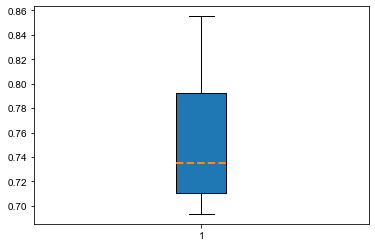

In [110]:
withILS
shuffle=withILS.sample(frac=1)
from sklearn.model_selection import train_test_split
data_cleaned = shuffle.drop(['Temp','Ag','Cu','Pd','Au'], axis = 1)
data_cleaned 
train_x, test_x, train_y, test_y = train_test_split(data_cleaned[features], data_cleaned["type"], train_size = 0.7, random_state = 2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion = "entropy", random_state=3, max_depth = 12, min_samples_split = 5, min_samples_leaf = 5)

dt.fit(train_x, train_y)

pred_test_dt = dt.predict(test_x)
pred_train_dt = dt.predict(train_x)

print(accuracy_score(test_y, pred_test_dt))
print(accuracy_score(train_y, pred_train_dt))
from sklearn.model_selection import cross_val_score
dt_cv_score = cross_val_score(dt, data_cleaned[features], data_cleaned["type"], cv = 20, scoring="accuracy")
dt_cv_score

outliers = dict(markerfacecolor = "r", marker = "o")
medianprops = dict(linestyle = "--", linewidth = 2, color = "darkorange")

plt.boxplot([ dt_cv_score], flierprops = outliers,
            patch_artist=True, vert=True, medianprops = medianprops)

#lr_cv_score, rf_cv_score, dt_cv_score,svm_cv_score
print(dt_cv_score.mean())

0.7703862660944206
0.9032258064516129
0.7795371295371296


{'whiskers': [<matplotlib.lines.Line2D at 0x17864b451c8>,
 'caps': [<matplotlib.lines.Line2D at 0x178001c3808>,
 'boxes': [<matplotlib.patches.PathPatch at 0x17864b45d88>],
 'medians': [<matplotlib.lines.Line2D at 0x178019f0a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x178019f0848>],
 'means': []}

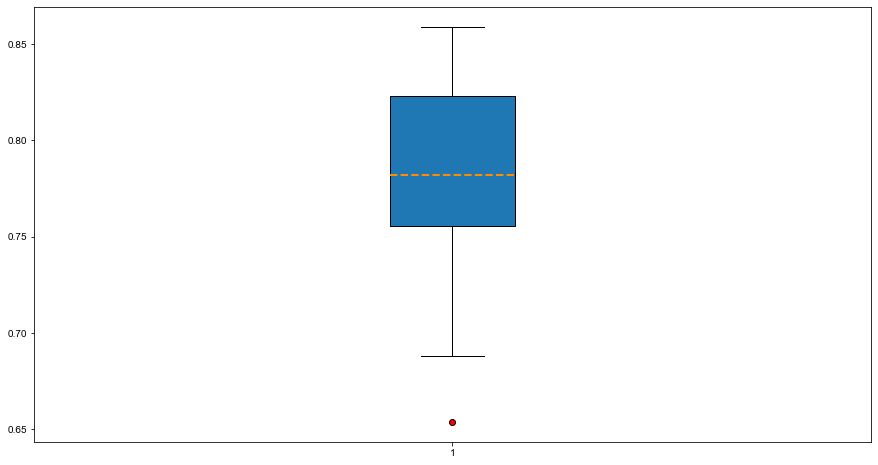

In [962]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=20, criterion = "entropy", max_depth = 9, min_samples_split = 5, min_samples_leaf = 5, 
                            max_features = 12, bootstrap=True, random_state=3)

rf.fit(train_x, train_y)

pred_test_rf = rf.predict(test_x)
pred_train_rf = rf.predict(train_x)

print(accuracy_score(test_y, pred_test_rf))
print(accuracy_score(train_y, pred_train_rf))
rf_cv_score = cross_val_score(rf, data_cleaned[features], data_cleaned["type"], cv = 20, scoring="accuracy")
print(rf_cv_score.mean())

outliers = dict(markerfacecolor = "r", marker = "o")
medianprops = dict(linestyle = "--", linewidth = 2, color = "darkorange")

plt.boxplot([ rf_cv_score], flierprops = outliers,
            patch_artist=True, vert=True, medianprops = medianprops)

In [938]:
#plt.figure(figsize=(8,5))    
#
#plt.plot(range(2,20),  km_scores, linewidth=2, color="red", marker ="8")
#plt.xlabel("k (number of clusters)", fontsize = 18)
#plt.xticks(np.arange(0,20,1), fontsize = 15)
#plt.yticks( fontsize = 15)
#plt.ylabel(" km_scores ", fontsize = 18)
#plt.savefig(' km_scores.png', dpi=300)  

In [941]:
#MetalDF['totalN']

In [99]:
km_opt = KMeans(n_clusters=5, random_state=0).fit(reduced_data)
print(reduced_data.shape)
preds = km_opt.predict(reduced_data)
print(len(preds))
Metal_n=Metal_new[colname[:-5]].drop_duplicates()
len(Metal_n)
Metal_n['preds']=preds
#display(Metal_n)
#display(Metal_new[['Temp','Ag','Cu','Pd','Au']])
#Metal_new.drop_duplicates()['preds']=preds
#Metal_new.drop_duplicates()['preds']
#pd.options.display.max_colwidth = 1000
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0]
#len(reduced_data)
#len(MetalDF.drop_duplicates())
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0].describe()
withlable=pd.concat([Metal_n, Metal_new[['Temp','Ag','Cu','Pd','Au']]], axis=1, join="inner")
withlable=pd.concat([withlable, MetalDF['totalN']], axis=1, join="inner")
withlable = withlable.loc[:,~withlable.columns.duplicated()]
withlable 

display(withlable.groupby(['preds']).mean().T.append(withlable.groupby(['preds']).count().T.iloc[-1]))
for i in range(5):
   #print('cluster '+str(i) + ' Ag Cu Pd Au, T='+ str(round(MEAN.loc['Temp'],3)))
   MEAN= withlable[withlable['preds']==i].describe().T.sort_values(by=['mean'])['mean']
   
   print('cluster '+str(i) + ', Mean Temp= '+ str(round(MEAN.loc['Temp'],3)), ', Mean Natoms= '+ str(round(MEAN.loc['totalN'],3)))
   #print('Ag: ' + str(round(MEAN.loc['Ag'],3)),
   #      ', Cu: '+ str(round(MEAN.loc['Cu'],3)),
   #      ', Pd: '+ str(round(MEAN.loc['Pd'],3)),
   #      ', Au: '+ str(round(MEAN.loc['Au'],3)))
   print(MEAN.loc[['Ag', 'Cu','Pd', 'Au']].sort_values(ascending= False))
   print(MEAN.loc[features].sort_values(ascending= False))
   print('\n')

(1511, 4)
1511


preds,0,1,2,3,4
fcc_bulk,0.001754,0.003442,0.179125,0.003738,0.153258
twin_HCP,0.009173,0.096915,0.156597,0.025862,0.127458
IhDh_spine,0.007611,0.066532,0.019567,0.017688,0.027290
Ihcenter,0.006611,0.002375,0.000000,0.003475,0.000750
Dh_notch_edge,0.005005,0.007074,0.025437,0.006370,0.013966
surface111,0.013442,0.092332,0.147400,0.023623,0.122898
surface100,0.000738,0.000435,0.032187,0.001351,0.022237
IhDh_edge,0.056816,0.260042,0.074491,0.061295,0.063062
edge_111_100,0.003527,0.006095,0.090333,0.004729,0.082069
edge_111_111,0.007369,0.004271,0.015851,0.006389,0.012486


cluster 0, Mean Temp= 832.509 , Mean Natoms= 130.178
Ag    0.339223
Cu    0.291519
Pd    0.287986
Au    0.081272
Name: mean, dtype: float64
Temp                832.508834
Unknown               0.769151
IhDh_vertex           0.057853
IhDh_edge             0.056816
Dh_notch_vertex       0.043899
TO_vertex             0.016720
surface111            0.013442
twin_HCP              0.009173
IhDh_spine            0.007611
edge_111_111          0.007369
Ihcenter              0.006611
Dh_notch_edge         0.005005
edge_111_100          0.003527
fcc_bulk              0.001754
surface100            0.000738
CO_vertex             0.000329
tetrahedral_edge      0.000000
Name: mean, dtype: float64


cluster 1, Mean Temp= 709.985 , Mean Natoms= 144.034
Au    0.437500
Pd    0.271341
Ag    0.149390
Cu    0.141768
Name: mean, dtype: float64
Temp                709.984756
Unknown               0.351094
IhDh_edge             0.260042
twin_HCP              0.096915
surface111            0.092332
IhDh_spin

In [193]:
km_opt = KMeans(n_clusters=7, random_state=0).fit(reduced_data)
print(reduced_data.shape)
preds = km_opt.predict(reduced_data)
print(len(preds))
Metal_n=Metal_new[colname[:-5]].drop_duplicates()
len(Metal_n)
Metal_n['preds']=preds
#display(Metal_n)
#display(Metal_new[['Temp','Ag','Cu','Pd','Au']])
#Metal_new.drop_duplicates()['preds']=preds
#Metal_new.drop_duplicates()['preds']
#pd.options.display.max_colwidth = 1000
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0]
#len(reduced_data)
#len(MetalDF.drop_duplicates())
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0].describe()
withlable=pd.concat([Metal_n, Metal_new[['Temp','Ag','Cu','Pd','Au']]], axis=1, join="inner")
withlable=pd.concat([withlable, MetalDF['totalN']], axis=1, join="inner")
withlable = withlable.loc[:,~withlable.columns.duplicated()]
withlable 

display(withlable.groupby(['preds']).mean().T.append(withlable.groupby(['preds']).count().T.iloc[-1]))
for i in range(7):
   #print('cluster '+str(i) + ' Ag Cu Pd Au, T='+ str(round(MEAN.loc['Temp'],3)))
   MEAN= withlable[withlable['preds']==i].describe().T.sort_values(by=['mean'])['mean']
   
   print('cluster '+str(i) + ', Mean Temp= '+ str(round(MEAN.loc['Temp'],3)), ', Mean Natoms= '+ str(round(MEAN.loc['totalN'],3)))
   #print('Ag: ' + str(round(MEAN.loc['Ag'],3)),
   #      ', Cu: '+ str(round(MEAN.loc['Cu'],3)),
   #      ', Pd: '+ str(round(MEAN.loc['Pd'],3)),
   #      ', Au: '+ str(round(MEAN.loc['Au'],3)))
   print(MEAN.loc[['Ag', 'Cu','Pd', 'Au']].sort_values(ascending= False))
   print(MEAN.loc[features].sort_values(ascending= False))
   print('\n')

#centroids  = km_opt.cluster_centers_ 
#pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index)

distance=pd.merge(MetalDF,pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index), left_index=True, right_index=True)
for i in range(7):
    display(i, distance[distance[i]==min(distance[i])].T)


(1511, 4)
1511


preds,0,1,2,3,4,5,6
fcc_bulk,0.007024,0.000357,0.182443,0.003764,0.003306,0.003738,0.182016
twin_HCP,0.107885,0.002653,0.156306,0.019893,0.098007,0.025862,0.146474
IhDh_spine,0.077448,0.005015,0.019316,0.012291,0.067201,0.017688,0.016598
Ihcenter,0.005445,0.012314,0.000000,0.000368,0.002397,0.003475,0.000000
Dh_notch_edge,0.004210,0.001000,0.025954,0.010367,0.006586,0.006370,0.019238
surface111,0.059159,0.006400,0.150797,0.027295,0.094254,0.023623,0.134881
surface100,0.001263,0.000414,0.031726,0.001345,0.000358,0.001351,0.031642
IhDh_edge,0.140453,0.042068,0.072997,0.092387,0.264693,0.061295,0.058614
edge_111_100,0.015593,0.001480,0.092566,0.005669,0.005693,0.004729,0.091394
edge_111_111,0.005160,0.001849,0.016407,0.013963,0.003496,0.006389,0.012437


cluster 0, Mean Temp= 757.614 , Mean Natoms= 136.659
Ag    0.590909
Cu    0.272727
Pd    0.113636
Au    0.022727
Name: mean, dtype: float64
Unknown             0.436065
IhDh_edge           0.140453
twin_HCP            0.107885
IhDh_spine          0.077448
surface111          0.059159
Dh_notch_vertex     0.057043
IhDh_vertex         0.050501
TO_vertex           0.024299
edge_111_100        0.015593
CO_vertex           0.008452
fcc_bulk            0.007024
Ihcenter            0.005445
edge_111_111        0.005160
Dh_notch_edge       0.004210
surface100          0.001263
tetrahedral_edge    0.000000
Name: mean, dtype: float64


cluster 1, Mean Temp= 857.899 , Mean Natoms= 132.753
Cu    0.500000
Pd    0.420139
Ag    0.072917
Au    0.006944
Name: mean, dtype: float64
Unknown             0.825450
IhDh_vertex         0.068116
IhDh_edge           0.042068
Dh_notch_vertex     0.025806
Ihcenter            0.012314
TO_vertex           0.006982
surface111          0.006400
IhDh_spine          0.00

0

,1785
fcc_bulk,0.000000
twin_HCP,7.000000
IhDh_spine,5.000000
Ihcenter,1.000000
Dh_notch_edge,0.000000
surface111,7.000000
surface100,0.000000
IhDh_edge,16.000000
edge_111_100,2.000000
edge_111_111,1.000000


1

,1984
fcc_bulk,0.000000
twin_HCP,0.000000
IhDh_spine,0.000000
Ihcenter,2.000000
Dh_notch_edge,0.000000
surface111,0.000000
surface100,0.000000
IhDh_edge,8.000000
edge_111_100,1.000000
edge_111_111,0.000000


2

,559
fcc_bulk,29.000000
twin_HCP,34.000000
IhDh_spine,3.000000
Ihcenter,0.000000
Dh_notch_edge,5.000000
surface111,24.000000
surface100,8.000000
IhDh_edge,9.000000
edge_111_100,15.000000
edge_111_111,1.000000


3

,2224
fcc_bulk,0.000000
twin_HCP,1.000000
IhDh_spine,1.000000
Ihcenter,0.000000
Dh_notch_edge,2.000000
surface111,2.000000
surface100,2.000000
IhDh_edge,12.000000
edge_111_100,0.000000
edge_111_111,1.000000


4

,1858
fcc_bulk,0.000000
twin_HCP,19.000000
IhDh_spine,10.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,15.000000
surface100,0.000000
IhDh_edge,41.000000
edge_111_100,1.000000
edge_111_111,0.000000


5

,123
fcc_bulk,0.000000
twin_HCP,2.000000
IhDh_spine,4.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,1.000000
surface100,0.000000
IhDh_edge,12.000000
edge_111_100,0.000000
edge_111_111,1.000000


6

,95
fcc_bulk,24.000000
twin_HCP,13.000000
IhDh_spine,0.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,17.000000
surface100,1.000000
IhDh_edge,0.000000
edge_111_100,12.000000
edge_111_111,1.000000


In [165]:
 #labels of shape [1000,] with values 0<= i <= 9
centroids  = km_opt.cluster_centers_ 
pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index)
#centroids 

,0,1,2,3,4,5,6
0,5.366286,2.210559,5.817183,1.018595,3.935998,6.858530,7.695445
1,4.384723,2.174433,5.643147,1.184929,1.899798,7.298239,7.458844
2,4.751465,2.084814,5.443916,0.159778,2.870303,6.969017,7.361814
3,5.016644,1.333251,6.380825,1.042925,3.484487,6.862821,8.009461
4,6.614258,7.240041,0.856990,5.278768,5.482449,8.904730,5.157174
...,...,...,...,...,...,...,...
2857,4.547034,4.664741,5.613868,3.786739,0.880993,8.197713,7.442824
2869,4.503007,4.354075,5.529327,3.436931,0.545018,8.034008,7.424619
2872,4.560593,4.666313,5.581486,3.758105,0.862450,8.101069,7.434820
2873,4.589074,4.369903,5.166182,3.236352,0.623511,7.874773,7.255759


In [194]:
#withlable 
#distance=pd.merge(MetalDF,pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index), left_index=True, right_index=True)
#for i in range(7):
#    display(i, distance[distance[i]==min(distance[i])].T)


In [196]:
km_opt = KMeans(n_clusters=5, random_state=0).fit(reduced_data)
print(reduced_data.shape)
preds = km_opt.predict(reduced_data)
print(len(preds))
Metal_n=Metal_new[colname[:-5]].drop_duplicates()
len(Metal_n)
Metal_n['preds']=preds
#display(Metal_n)
#display(Metal_new[['Temp','Ag','Cu','Pd','Au']])
#Metal_new.drop_duplicates()['preds']=preds
#Metal_new.drop_duplicates()['preds']
#pd.options.display.max_colwidth = 1000
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0]
#len(reduced_data)
#len(MetalDF.drop_duplicates())
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0].describe()
withlable=pd.concat([Metal_n, Metal_new[['Temp','Ag','Cu','Pd','Au']]], axis=1, join="inner")
withlable=pd.concat([withlable, MetalDF['totalN']], axis=1, join="inner")
withlable = withlable.loc[:,~withlable.columns.duplicated()]
withlable 

display(withlable.groupby(['preds']).mean().T.append(withlable.groupby(['preds']).count().T.iloc[-1]))
for i in range(5):
   #print('cluster '+str(i) + ' Ag Cu Pd Au, T='+ str(round(MEAN.loc['Temp'],3)))
   MEAN= withlable[withlable['preds']==i].describe().T.sort_values(by=['mean'])['mean']
   
   print('cluster '+str(i) + ', Mean Temp= '+ str(round(MEAN.loc['Temp'],3)), ', Mean Natoms= '+ str(round(MEAN.loc['totalN'],3)))
   #print('Ag: ' + str(round(MEAN.loc['Ag'],3)),
   #      ', Cu: '+ str(round(MEAN.loc['Cu'],3)),
   #      ', Pd: '+ str(round(MEAN.loc['Pd'],3)),
   #      ', Au: '+ str(round(MEAN.loc['Au'],3)))
   print(MEAN.loc[['Ag', 'Cu','Pd', 'Au']].sort_values(ascending= False))
   print(MEAN.loc[features].sort_values(ascending= False))
   print('\n')

#centroids  = km_opt.cluster_centers_ 
#pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index)

distance=pd.merge(MetalDF,pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index), left_index=True, right_index=True)
for i in range(5):
    display(i, distance[distance[i]==min(distance[i])].T)


(1511, 4)
1511


preds,0,1,2,3,4
fcc_bulk,0.001754,0.003442,0.179125,0.003738,0.153258
twin_HCP,0.009173,0.096915,0.156597,0.025862,0.127458
IhDh_spine,0.007611,0.066532,0.019567,0.017688,0.027290
Ihcenter,0.006611,0.002375,0.000000,0.003475,0.000750
Dh_notch_edge,0.005005,0.007074,0.025437,0.006370,0.013966
surface111,0.013442,0.092332,0.147400,0.023623,0.122898
surface100,0.000738,0.000435,0.032187,0.001351,0.022237
IhDh_edge,0.056816,0.260042,0.074491,0.061295,0.063062
edge_111_100,0.003527,0.006095,0.090333,0.004729,0.082069
edge_111_111,0.007369,0.004271,0.015851,0.006389,0.012486


cluster 0, Mean Temp= 832.509 , Mean Natoms= 130.178
Ag    0.339223
Cu    0.291519
Pd    0.287986
Au    0.081272
Name: mean, dtype: float64
Unknown             0.769151
IhDh_vertex         0.057853
IhDh_edge           0.056816
Dh_notch_vertex     0.043899
TO_vertex           0.016720
surface111          0.013442
twin_HCP            0.009173
IhDh_spine          0.007611
edge_111_111        0.007369
Ihcenter            0.006611
Dh_notch_edge       0.005005
edge_111_100        0.003527
fcc_bulk            0.001754
surface100          0.000738
CO_vertex           0.000329
tetrahedral_edge    0.000000
Name: mean, dtype: float64


cluster 1, Mean Temp= 709.985 , Mean Natoms= 144.034
Au    0.437500
Pd    0.271341
Ag    0.149390
Cu    0.141768
Name: mean, dtype: float64
Unknown             0.351094
IhDh_edge           0.260042
twin_HCP            0.096915
surface111          0.092332
IhDh_spine          0.066532
IhDh_vertex         0.061539
Dh_notch_vertex     0.040425
TO_vertex           0.00

0

,454
fcc_bulk,0.000000
twin_HCP,2.000000
IhDh_spine,3.000000
Ihcenter,2.000000
Dh_notch_edge,0.000000
surface111,0.000000
surface100,0.000000
IhDh_edge,12.000000
edge_111_100,0.000000
edge_111_111,2.000000


1

,2662
fcc_bulk,2.000000
twin_HCP,17.000000
IhDh_spine,10.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,13.000000
surface100,1.000000
IhDh_edge,45.000000
edge_111_100,3.000000
edge_111_111,0.000000


2

,579
fcc_bulk,28.000000
twin_HCP,34.000000
IhDh_spine,3.000000
Ihcenter,0.000000
Dh_notch_edge,3.000000
surface111,23.000000
surface100,9.000000
IhDh_edge,9.000000
edge_111_100,15.000000
edge_111_111,1.000000


3

,123
fcc_bulk,0.000000
twin_HCP,2.000000
IhDh_spine,4.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,1.000000
surface100,0.000000
IhDh_edge,12.000000
edge_111_100,0.000000
edge_111_111,1.000000


4

,530
fcc_bulk,23.000000
twin_HCP,29.000000
IhDh_spine,5.000000
Ihcenter,0.000000
Dh_notch_edge,1.000000
surface111,16.000000
surface100,11.000000
IhDh_edge,15.000000
edge_111_100,10.000000
edge_111_111,4.000000


In [200]:
km_opt = KMeans(n_clusters=8, random_state=0).fit(reduced_data)
print(reduced_data.shape)
preds = km_opt.predict(reduced_data)
print(len(preds))
Metal_n=Metal_new[colname[:-5]].drop_duplicates()
len(Metal_n)
Metal_n['preds']=preds
#display(Metal_n)
#display(Metal_new[['Temp','Ag','Cu','Pd','Au']])
#Metal_new.drop_duplicates()['preds']=preds
#Metal_new.drop_duplicates()['preds']
#pd.options.display.max_colwidth = 1000
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0]
#len(reduced_data)
#len(MetalDF.drop_duplicates())
#Metal_new.drop_duplicates()[Metal_new.drop_duplicates()['preds']==0].describe()
withlable=pd.concat([Metal_n, Metal_new[['Temp','Ag','Cu','Pd','Au']]], axis=1, join="inner")
withlable=pd.concat([withlable, MetalDF['totalN']], axis=1, join="inner")
withlable = withlable.loc[:,~withlable.columns.duplicated()]
withlable 

display(withlable.groupby(['preds']).mean().T.append(withlable.groupby(['preds']).count().T.iloc[-1]))
for i in range(8):
   #print('cluster '+str(i) + ' Ag Cu Pd Au, T='+ str(round(MEAN.loc['Temp'],3)))
   MEAN= withlable[withlable['preds']==i].describe().T.sort_values(by=['mean'])['mean']
   
   print('cluster '+str(i) + ', Mean Temp= '+ str(round(MEAN.loc['Temp'],3)), ', Mean Natoms= '+ str(round(MEAN.loc['totalN'],3)))
   #print('Ag: ' + str(round(MEAN.loc['Ag'],3)),
   #      ', Cu: '+ str(round(MEAN.loc['Cu'],3)),
   #      ', Pd: '+ str(round(MEAN.loc['Pd'],3)),
   #      ', Au: '+ str(round(MEAN.loc['Au'],3)))
   print(MEAN.loc[['Ag', 'Cu','Pd', 'Au']].sort_values(ascending= False))
   print(MEAN.loc[features].sort_values(ascending= False))
   print('\n')

#centroids  = km_opt.cluster_centers_ 
#pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index)

distance=pd.merge(MetalDF,pd.DataFrame(km_opt.transform(reduced_data), index=withlable.index), left_index=True, right_index=True)
for i in range(8):
    display(i, distance[distance[i]==min(distance[i])].T)


(1511, 4)
1511


preds,0,1,2,3,4,5,6,7
fcc_bulk,0.182443,0.002808,0.000387,0.003738,0.182016,0.003554,0.007024,0.004111
twin_HCP,0.156306,0.056091,0.002421,0.025862,0.146474,0.133981,0.107885,0.017152
IhDh_spine,0.019316,0.041821,0.004509,0.017688,0.016598,0.088843,0.077448,0.009687
Ihcenter,0.000000,0.000460,0.012550,0.003475,0.000000,0.004213,0.005445,0.000469
Dh_notch_edge,0.025954,0.009508,0.000994,0.006370,0.019238,0.003980,0.004210,0.010061
surface111,0.150797,0.070040,0.006074,0.023623,0.134881,0.113543,0.059159,0.022811
surface100,0.031726,0.000491,0.000394,0.001351,0.031642,0.000314,0.001263,0.001422
IhDh_edge,0.072997,0.244447,0.038579,0.061295,0.058614,0.276110,0.140453,0.072457
edge_111_100,0.092566,0.004036,0.001445,0.004729,0.091394,0.007251,0.015593,0.005974
edge_111_111,0.016407,0.005538,0.001864,0.006389,0.012437,0.002160,0.005160,0.014645


cluster 0, Mean Temp= 550.398 , Mean Natoms= 167.949
Ag    0.562500
Pd    0.403409
Cu    0.034091
Au    0.000000
Name: mean, dtype: float64
fcc_bulk            0.182443
twin_HCP            0.156306
surface111          0.150797
TO_vertex           0.117153
edge_111_100        0.092566
Unknown             0.078302
IhDh_edge           0.072997
Dh_notch_vertex     0.048425
surface100          0.031726
Dh_notch_edge       0.025954
IhDh_spine          0.019316
edge_111_111        0.016407
IhDh_vertex         0.007403
CO_vertex           0.000148
tetrahedral_edge    0.000057
Ihcenter            0.000000
Name: mean, dtype: float64


cluster 1, Mean Temp= 724.653 , Mean Natoms= 128.861
Au    0.514451
Pd    0.312139
Cu    0.101156
Ag    0.072254
Name: mean, dtype: float64
Unknown             0.442809
IhDh_edge           0.244447
IhDh_vertex         0.070186
surface111          0.070040
twin_HCP            0.056091
Dh_notch_vertex     0.044005
IhDh_spine          0.041821
Dh_notch_edge       0.00

0

,559
fcc_bulk,29.000000
twin_HCP,34.000000
IhDh_spine,3.000000
Ihcenter,0.000000
Dh_notch_edge,5.000000
surface111,24.000000
surface100,8.000000
IhDh_edge,9.000000
edge_111_100,15.000000
edge_111_111,1.000000


1

,2268
fcc_bulk,0.000000
twin_HCP,8.000000
IhDh_spine,3.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,7.000000
surface100,0.000000
IhDh_edge,33.000000
edge_111_100,1.000000
edge_111_111,1.000000


2

,1984
fcc_bulk,0.000000
twin_HCP,0.000000
IhDh_spine,0.000000
Ihcenter,2.000000
Dh_notch_edge,0.000000
surface111,0.000000
surface100,0.000000
IhDh_edge,8.000000
edge_111_100,1.000000
edge_111_111,0.000000


3

,123
fcc_bulk,0.000000
twin_HCP,2.000000
IhDh_spine,4.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,1.000000
surface100,0.000000
IhDh_edge,12.000000
edge_111_100,0.000000
edge_111_111,1.000000


4

,95
fcc_bulk,24.000000
twin_HCP,13.000000
IhDh_spine,0.000000
Ihcenter,0.000000
Dh_notch_edge,0.000000
surface111,17.000000
surface100,1.000000
IhDh_edge,0.000000
edge_111_100,12.000000
edge_111_111,1.000000


5

,1870
fcc_bulk,0.000000
twin_HCP,26.000000
IhDh_spine,12.000000
Ihcenter,1.000000
Dh_notch_edge,0.000000
surface111,21.000000
surface100,0.000000
IhDh_edge,44.000000
edge_111_100,1.000000
edge_111_111,0.000000


6

,1785
fcc_bulk,0.000000
twin_HCP,7.000000
IhDh_spine,5.000000
Ihcenter,1.000000
Dh_notch_edge,0.000000
surface111,7.000000
surface100,0.000000
IhDh_edge,16.000000
edge_111_100,2.000000
edge_111_111,1.000000


7

,290
fcc_bulk,0.000000
twin_HCP,3.000000
IhDh_spine,1.000000
Ihcenter,0.000000
Dh_notch_edge,3.000000
surface111,1.000000
surface100,0.000000
IhDh_edge,7.000000
edge_111_100,0.000000
edge_111_111,1.000000


In [83]:
#display(withlable.groupby(['preds']).mean().T)
#display(withlable.groupby(['preds']).count().T.iloc[0])
#display(withlable.groupby(['preds']).mean().T.append(withlable.groupby(['preds']).count().T.iloc[-1]))
#for i in range(7):
#   #print('cluster '+str(i) + ' Ag Cu Pd Au, T='+ str(round(MEAN.loc['Temp'],3)))
#   MEAN= withlable[withlable['preds']==i].describe().T.sort_values(by=['mean'])['mean']
#   
#   print('cluster '+str(i) + ', Mean Temp= '+ str(round(MEAN.loc['Temp'],3)), ', Mean Natoms= '+ str(round(MEAN.loc['totalN'],3)))
#   #print('Ag: ' + str(round(MEAN.loc['Ag'],3)),
#   #      ', Cu: '+ str(round(MEAN.loc['Cu'],3)),
#   #      ', Pd: '+ str(round(MEAN.loc['Pd'],3)),
#   #      ', Au: '+ str(round(MEAN.loc['Au'],3)))
#   print(MEAN.loc[['Ag', 'Cu','Pd', 'Au']].sort_values(ascending= False))
#   print(MEAN.loc[features].sort_values(ascending= False))
#   print('\n')

cluster 0 (420):  Au(54%) > Pd (25%)> Cu(12%) > Ag(7%),  medium size and Temp ,top 3: unknown IhDhedge,surface 111,vertex

cluster 1 (203): Ag(56%)>Pd(37%)> Cu > Au(0), largest size and lowest Temp,
top 3: fcc,hcp,surface 111

cluster 2 (268): Pd(28%)>Cu(25%)>Au(23%)=Ag(23%), large size and low temp, top 3: IhDh edge, unknown, hcp

cluster 3 (328): Ag(50%)>Pd(21%)>Cu(15%)>Au(12%), smallest size and high temp, top3: unknown, IhDh edge, Dh notch vertex

cluster 4 (30): Ag(60%)>Pd(33%)> Cu > Au (no), low temp and small size, top 3: fcc TOvertex surface111 unknown twinHCP

cluster 5 (51): Ag(58%)> Cu(21%)> Pd(19%) > Au(no), medium-high temp and size, top 3: Unknown, IhDhedge, Dh notch vertex  

cluster 6 (207):  Cu(55%)> Pd(40%) > Ag(3%)> Au(1%), highest Temp and small to medium size , top 3: unknown, Ihdh vertex, IhDhedge

cluster 7 (44): Ag(68%)> Cu(22%)> Pd(6%) >Au(2%),  medium size, high temp, top 3: unknown IhDH egde, twinHCP



## Decisision Tree on KMeans (k=8)

0.9118942731277533
0.9640491958372753
0.9139824561403511


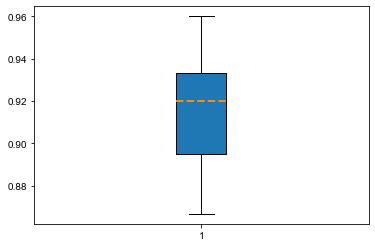

In [112]:
withlable
shuffle=withlable.sample(frac=1)
features = colname[:16]
from sklearn.model_selection import train_test_split
data_cleaned = shuffle.drop(['Temp','Ag','Cu','Pd','Au'], axis = 1)
data_cleaned 
train_x, test_x, train_y, test_y = train_test_split(data_cleaned[features], data_cleaned["preds"], train_size = 0.7, random_state = 2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion = "entropy", random_state=3, max_depth = 8, min_samples_split = 5, min_samples_leaf = 5)

dt.fit(train_x, train_y)

pred_test_dt = dt.predict(test_x)
pred_train_dt = dt.predict(train_x)

print(accuracy_score(test_y, pred_test_dt))
print(accuracy_score(train_y, pred_train_dt))
from sklearn.model_selection import cross_val_score
dt_cv_score = cross_val_score(dt, data_cleaned[features], data_cleaned["preds"], cv = 20, scoring="accuracy")
dt_cv_score

outliers = dict(markerfacecolor = "r", marker = "o")
medianprops = dict(linestyle = "--", linewidth = 2, color = "darkorange")

plt.boxplot([ dt_cv_score], flierprops = outliers,
            patch_artist=True, vert=True, medianprops = medianprops)

#lr_cv_score, rf_cv_score, dt_cv_score,svm_cv_score
print(dt_cv_score.mean())

            features  importance
7          IhDh_edge    0.325063
15           Unknown    0.236085
3           Ihcenter    0.203059
14         CO_vertex    0.075932
12  tetrahedral_edge    0.070454
9       edge_111_111    0.027601
1           twin_HCP    0.025966
10   Dh_notch_vertex    0.019285
5         surface111    0.011348
13         TO_vertex    0.003397
11       IhDh_vertex    0.001811
0           fcc_bulk    0.000000
2         IhDh_spine    0.000000
4      Dh_notch_edge    0.000000
6         surface100    0.000000
8       edge_111_100    0.000000


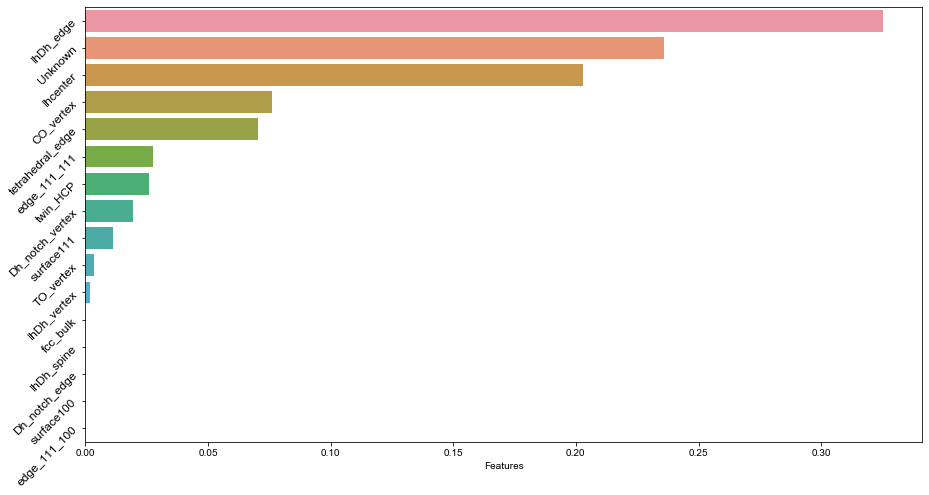

In [958]:
feat_imp = pd.DataFrame(data = {"features": features, "importance": dt.feature_importances_}).sort_values("importance", ascending = False)

print(feat_imp)

from pylab import rcParams
rcParams["figure.figsize"] = 15, 8

sns.barplot(feat_imp["importance"], feat_imp["features"])
plt.xlabel("Features")
plt.ylabel(None)
plt.yticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("DT_feature_imp.png", dpi = 300)

plt.show()


0.9420600858369099
0.9769585253456221
0.941949716949717


{'whiskers': [<matplotlib.lines.Line2D at 0x178002609c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17864ad2808>,
 'boxes': [<matplotlib.patches.PathPatch at 0x178669fdc08>],
 'medians': [<matplotlib.lines.Line2D at 0x17864ad2408>],
 'fliers': [<matplotlib.lines.Line2D at 0x17866a1a148>],
 'means': []}

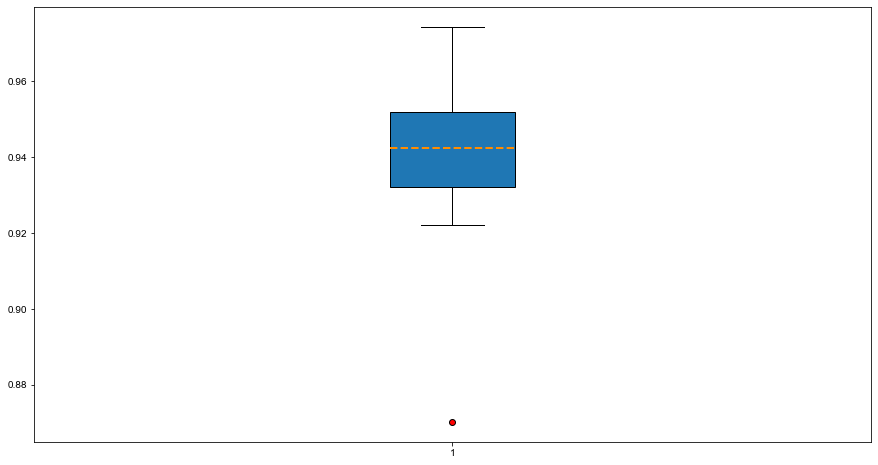

In [1035]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=20, criterion = "entropy", max_depth = 9, min_samples_split = 5, min_samples_leaf = 5, 
                            max_features = 10, bootstrap=True, random_state=3)

rf.fit(train_x, train_y)

pred_test_rf = rf.predict(test_x)
pred_train_rf = rf.predict(train_x)

print(accuracy_score(test_y, pred_test_rf))
print(accuracy_score(train_y, pred_train_rf))
rf_cv_score = cross_val_score(rf, data_cleaned[features], data_cleaned["preds"], cv = 20, scoring="accuracy")
print(rf_cv_score.mean())

outliers = dict(markerfacecolor = "r", marker = "o")
medianprops = dict(linestyle = "--", linewidth = 2, color = "darkorange")

plt.boxplot([ rf_cv_score], flierprops = outliers,
            patch_artist=True, vert=True, medianprops = medianprops)

            features  importance
15           Unknown    0.231161
7          IhDh_edge    0.186780
3           Ihcenter    0.167067
5         surface111    0.077066
14         CO_vertex    0.060941
0           fcc_bulk    0.056948
12  tetrahedral_edge    0.056870
11       IhDh_vertex    0.052026
1           twin_HCP    0.023963
10   Dh_notch_vertex    0.021119
9       edge_111_111    0.018754
13         TO_vertex    0.017492
2         IhDh_spine    0.015518
8       edge_111_100    0.011063
4      Dh_notch_edge    0.002993
6         surface100    0.000240


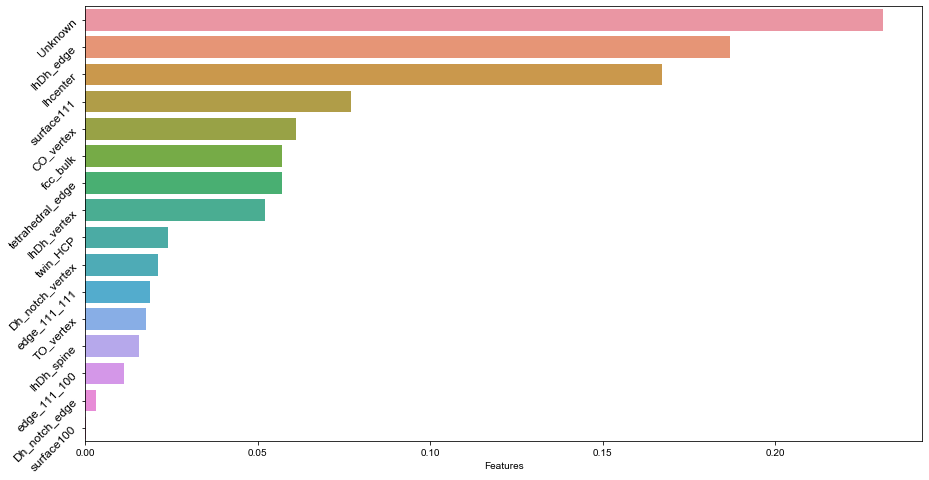

In [957]:
feat_imp = pd.DataFrame(data = {"features": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)

print(feat_imp)

from pylab import rcParams
rcParams["figure.figsize"] = 15, 8

sns.barplot(feat_imp["importance"], feat_imp["features"])
plt.xlabel("Features")
plt.ylabel(None)
plt.yticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig("RF_feature_imp.png", dpi = 300)

plt.show()

## Random Forests

0.9377682403433476
0.9732718894009217
0.9471028971028972


{'whiskers': [<matplotlib.lines.Line2D at 0x17879921508>,
 'caps': [<matplotlib.lines.Line2D at 0x17879921d08>,
 'boxes': [<matplotlib.patches.PathPatch at 0x17879921108>],
 'medians': [<matplotlib.lines.Line2D at 0x17879926c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x17879926d88>],
 'means': []}

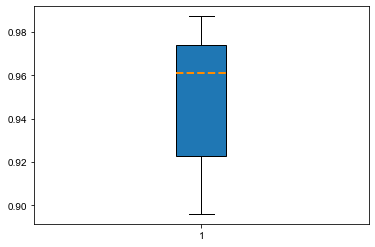

In [629]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=20, criterion = "entropy", max_depth = 9, min_samples_split = 5, min_samples_leaf = 5, 
                            max_features = 10, bootstrap=True, random_state=3)

rf.fit(train_x, train_y)

pred_test_rf = rf.predict(test_x)
pred_train_rf = rf.predict(train_x)

print(accuracy_score(test_y, pred_test_rf))
print(accuracy_score(train_y, pred_train_rf))
rf_cv_score = cross_val_score(rf, data_cleaned[features], data_cleaned["preds"], cv = 20, scoring="accuracy")
print(rf_cv_score.mean())

outliers = dict(markerfacecolor = "r", marker = "o")
medianprops = dict(linestyle = "--", linewidth = 2, color = "darkorange")

plt.boxplot([ rf_cv_score], flierprops = outliers,
            patch_artist=True, vert=True, medianprops = medianprops)

In [1051]:
print(rf.predict(transData[features]))

[3 3 3 ... 2 2 2]


In [1057]:
MetalDF_lab=MetalDF.copy()
MetalDF_lab['pred']=rf.predict(transData[features])
MetalDF_lab.to_csv('metal.csv',index=False)  #[:50]

## Label propogation

In [601]:
#import numpy as np
#from sklearn import datasets
#from sklearn.semi_supervised import LabelPropagation
#label_prop_model = LabelPropagation()
#iris = datasets.load_iris()
#print(iris)
#rng = np.random.RandomState(42)
#random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
#labels = np.copy(iris.target)
##print(labels)
#labels[random_unlabeled_points] = -1
#label_prop_model.fit(iris.data, labels)
#LabelPropagation(...)

## DBSCN

In [126]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
features = colname[:-5]


In [130]:
db = DBSCAN(eps=0.2, min_samples=10).fit(reduced_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(reduced_data, labels))

Estimated number of clusters: 11
Estimated number of noise points: 1189
Silhouette Coefficient: -0.392


## AgglomerativeClustering

In [116]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [117]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

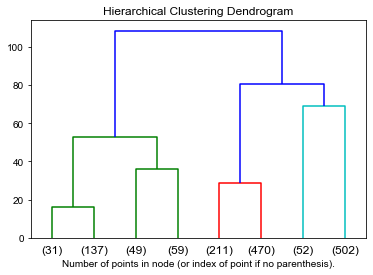

In [118]:
model = AgglomerativeClustering(distance_threshold=1, n_clusters=None)

model = model.fit(reduced_data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## hdbscan

In [119]:
import hdbscan

In [121]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,metric='manhattan')
clusterer.fit(reduced_data)
clusterer.labels_.max()

6

In [125]:
from sklearn.metrics.pairwise import pairwise_distances
distance_matrix = pairwise_distances(reduced_data)
clusterer = hdbscan.HDBSCAN(metric='precomputed',min_cluster_size=15)
clusterer.fit(distance_matrix)
clusterer.labels_.max()
len(clusterer.labels_)

1511

## OPTICS

In [123]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=30).fit(reduced_data)
clustering.labels_.max()


3